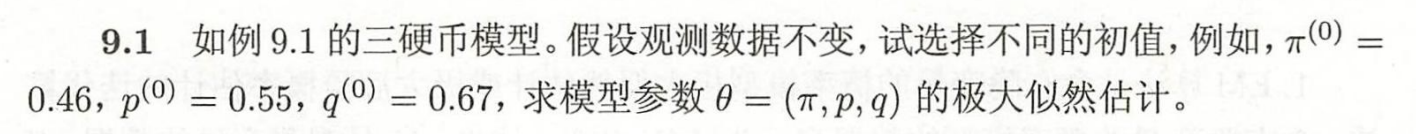

In [1]:
%matplotlib inline
import numpy as np
import math

class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob

    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i])
        return pro_1 / (pro_1 + pro_2)

    def fit(self, data):
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B,
                                            self.pro_C))
        count = len(data)
        theta = 1
        d = 0
        while (theta > 0.00001):
            # 迭代阻塞
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1 / count * sum(_pmf)
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)])
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)])
            d += 1
            print('{}  pro_a:{:.4f}, pro_b:{:.4f}, pro_c:{:.4f}'.format(
                d, pro_A, pro_B, pro_C))
            theta = abs(self.pro_A - pro_A) + abs(self.pro_B -
                                                  pro_B) + abs(self.pro_C -
                                                               pro_C)
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [2]:
# 加载数据
data = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]

em = EM(prob=[0.46, 0.55, 0.67])
f = em.fit(data)

init prob:0.46, 0.55, 0.67
1  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
2  pro_a:0.4619, pro_b:0.5346, pro_c:0.6561
